In [29]:
import numpy as np
np.random.seed(22)
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.mixture import GaussianMixture
from plotting_gauss import plot_results

In [24]:
def generate_dataset():
    cov1 = np.array([   [1, 0],
                        [0, 2]])
    cov2 = np.array([   [2, 0],
                        [0, 1]])
    data1 = np.random.multivariate_normal(np.array([0, 0]), cov1, 100)
    data2 = np.random.multivariate_normal(np.array([2, 2]), cov2, 100)
    data = np.concatenate((data1, data2), axis=0)
    classes = np.array([0 for i in range(100)] + [1 for i in range(100)])
    return data, classes

In [25]:
x, y = generate_dataset()

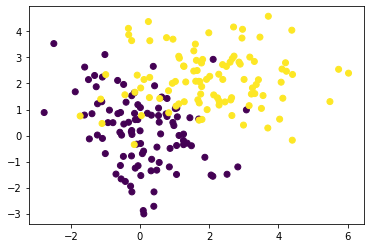

In [26]:
plt.scatter(x[:,0], x[:,1], c=y)
plt.show()

In [27]:
n_components = 2

gauss = GaussianMixture(n_components=n_components, covariance_type="diag")
gauss.fit(x)

print(f"Model converged: {gauss.converged_}")

Model converged: True


In [28]:
covs = gauss.covariances_
means = gauss.means_

#print(f"Covs: \n{covs}")
#print(f"Means: \n{means}")

print("Cov:")
print(np.diag(covs[0]), "\n")
print(np.diag(covs[1]), "\n")

print("Means:")
print(means[0])
print(means[1])

Cov:
[[1.9656771  0.        ]
 [0.         1.16145097]] 

[[1.14064386 0.        ]
 [0.         2.21332467]] 

Means:
[2.42033073 2.15607789]
[0.14625089 0.51860578]


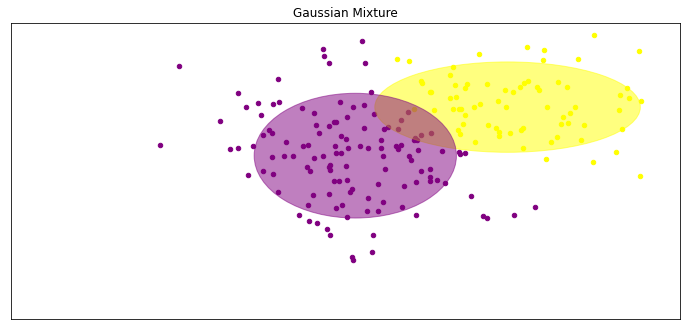

In [31]:
cov1 = np.diag(covs[0])
cov2 = np.diag(covs[1])

plot_results(x, y, gauss.predict(x), means, [cov1, cov2], 0, "Gaussian Mixture")